In [1]:
!pip install firebase-admin



In [3]:
import firebase_admin
from firebase_admin import credentials, db

cred = credentials.Certificate("invisible-infra-2fa6c-firebase-adminsdk-fbsvc-b4c5853464.json")
firebase_admin.initialize_app(cred, {
    "databaseURL": "https://invisible-infra-2fa6c-default-rtdb.firebaseio.com/"
})

print("Firebase connected successfully")


Firebase connected successfully


    Day  Water Usage (Liters)            Status
0     1                  1030            Normal
1     2                  1040            Normal
2     3                   963            Normal
3     4                   951            Normal
4     5                   981            Normal
5     6                  1019            Normal
6     7                   958            Normal
7     8                  1021            Normal
8     9                  1011            Normal
9    10                  1490  ⚠️ Risk Detected
10   11                  1564  ⚠️ Risk Detected
11   12                  1662  ⚠️ Risk Detected
12   13                  1584  ⚠️ Risk Detected
13   14                  1411  ⚠️ Risk Detected
14   15                  1615  ⚠️ Risk Detected


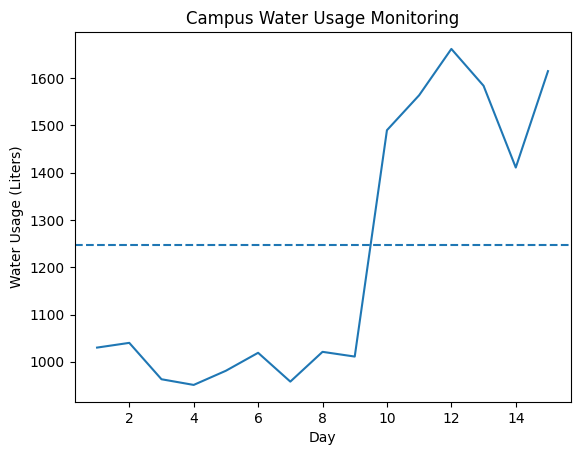


⚠️ ALERT: Abnormal water usage detected BEFORE any complaints.


In [5]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# Create fake daily water usage data
days = list(range(1, 16))
usage = []

for day in days:
    if day <= 9:
        usage.append(random.randint(950, 1050))   # normal
    else:
        usage.append(random.randint(1400, 1700))  # abnormal

df = pd.DataFrame({
    "Day": days,
    "Water Usage (Liters)": usage
})

# Simple anomaly detection
normal_mean = df["Water Usage (Liters)"][:9].mean()
threshold = normal_mean * 1.25

df["Status"] = df["Water Usage (Liters)"].apply(
    lambda x: "⚠️ Risk Detected" if x > threshold else "Normal"
)

print(df)

# Plot
plt.plot(df["Day"], df["Water Usage (Liters)"])
plt.axhline(y=threshold, linestyle='--')
plt.xlabel("Day")
plt.ylabel("Water Usage (Liters)")
plt.title("Campus Water Usage Monitoring")
plt.show()
if (df["Status"] == "⚠️ Risk Detected").any():
    print("\n⚠️ ALERT: Abnormal water usage detected BEFORE any complaints.")
else:
    print("\nAll systems normal.")

In [6]:
from firebase_admin import db

# Reference to database path
ref = db.reference("water_usage")

# Push each row to Firebase
for i in range(len(df)):
    ref.push({
        "day": int(df.iloc[i]["Day"]),
        "usage": int(df.iloc[i]["Water Usage (Liters)"]),
        "status": df.iloc[i]["Status"]
    })

print("Water usage data sent to Firebase")


Water usage data sent to Firebase


In [7]:
from firebase_admin import db

ref = db.reference("water_usage")

data = ref.get()

for key, value in data.items():
    print(value)


{'day': 1, 'status': 'Normal', 'usage': 1030}
{'day': 2, 'status': 'Normal', 'usage': 1040}
{'day': 3, 'status': 'Normal', 'usage': 963}
{'day': 4, 'status': 'Normal', 'usage': 951}
{'day': 5, 'status': 'Normal', 'usage': 981}
{'day': 6, 'status': 'Normal', 'usage': 1019}
{'day': 7, 'status': 'Normal', 'usage': 958}
{'day': 8, 'status': 'Normal', 'usage': 1021}
{'day': 9, 'status': 'Normal', 'usage': 1011}
{'day': 10, 'status': '⚠️ Risk Detected', 'usage': 1490}
{'day': 11, 'status': '⚠️ Risk Detected', 'usage': 1564}
{'day': 12, 'status': '⚠️ Risk Detected', 'usage': 1662}
{'day': 13, 'status': '⚠️ Risk Detected', 'usage': 1584}
{'day': 14, 'status': '⚠️ Risk Detected', 'usage': 1411}
{'day': 15, 'status': '⚠️ Risk Detected', 'usage': 1615}


In [8]:
risk_found = False

for key, value in data.items():
    if value["status"] == "⚠️ Risk Detected":
        risk_found = True
        print("🚨 ALERT: Infrastructure risk detected BEFORE complaints")
        print("Suggested action: Inspect water tank / pipeline")

if not risk_found:
    print("✅ All systems operating normally")


🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
🚨 ALERT: Infrastructure risk detected BEFORE complaints
Suggested action: Inspect water tank / pipeline
